In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('polynomial.csv',header = 0)

In [43]:
# Get data in arrays
x = df[['x']].values
y = df.y.values
f = df.f.values

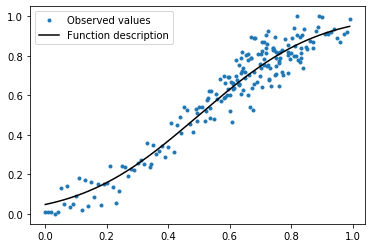

In [44]:
# Visualise the distribution
fig, ax = plt.subplots()
ax.plot(x,y, '.', label = 'Observed values')
ax.plot(x,f, 'k-', label = 'Function description')
ax.legend(loc = 'best')

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# get an index of training and test data
itrain, itest = train_test_split(np.arange(len(x)), train_size = 0.8)

In [58]:
# Use the index to separate training and test data
xtrain,ytrain = x[itrain], y[itrain]
xtest, ytest = x[itest],y[itest]

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [64]:
# Select the maximum degree of the polynomial
maxdeg = 30
# Create two empty lists to store training and testing MSEs
training_error, testing_error = np.empty((2,maxdeg))
#Run a for loop through the degrees of the polynomial, fit linear regression, predict y values and calculate the training and testing errors and update it to the list
for d in range(maxdeg):
    Xtrain = PolynomialFeatures(d).fit_transform(xtrain)
    Xtest = PolynomialFeatures(d).fit_transform(xtest)
    est = LinearRegression()
    est.fit(Xtrain, ytrain)
    ytrain_pred = est.predict(Xtrain)
    ytest_pred = est.predict(Xtest)
    training_error[d] = mean_squared_error(ytrain, ytrain_pred)
    testing_error[d] = mean_squared_error(ytest, ytest_pred)

In [65]:
# Find the best value of d, which gives the least error on the test data
best_d = np.argmin(testing_error)

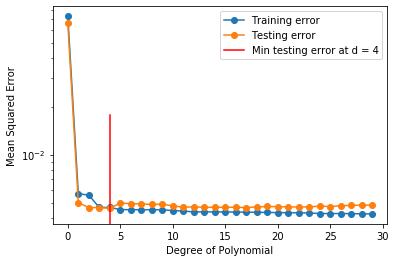

In [62]:
# Plot the errors as a function of increasing d value to visualise the training and testing errors
fig, ax = plt.subplots()
ax.plot(range(maxdeg), training_error, marker = 'o', label = 'Training error')
ax.plot(range(maxdeg), testing_error, marker = 'o', label = 'Testing error')
ax.axvline(best_d, 0, 0.5, color = 'r', label = f'Min testing error at d = {best_d}')
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
ax.set_yscale('log')

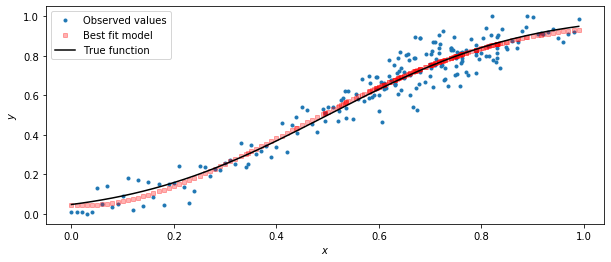

In [66]:
# Observe the fit of the polyonomial to the data and the actual function
X = PolynomialFeatures(best_d).fit_transform(x.reshape(-1,1))
est = LinearRegression()
est.fit(X,y)
y_pred = est.predict(X)
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(x,y, '.', label = 'Observed values')
ax.plot(x, y_pred, 's', color = 'r', alpha = 0.3, ms = 4, label = 'Best fit model')
ax.plot(x,f, 'k-', label = 'True function')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc = 'best')
